## ATU -Programming for Data Analysis, Winter 2023/24
## Project 1
##### Author: Norbert Antal

## **Analysis and simulation of data based on real world Employee data**

This project aims to investigate the variables, data distribution and relationships in a dataset based on real world data of at least 4 different variables and create a synthetic dataset that is simulating the same data as closely matching its properties as possible.

### 1. Obtaining data

For sourcing real-world data, Kaggle.com was a valuable resource. Kaggle is a platform *"to learn data science and build a portfolio"*, providing access to large number of diverse datasets relevant to various domains.
The *Salary_Base_data* dataset was chosen as a sample because it covers a domain, employee data, that could prove valuable for examination, especially for those interested in contributing to future projects in the workplace, related to wages, bonus schemes, or other HR related topics. <br>The dataset is anonymised, both employee names and the company name or other specific details regarding the company are excluded from the dataset.

### 1.1 Load required python modules

Some essential Python libraries are required for this project; Pandas for data manipulation, Matplotlib and Seaborn for data visualization, NumPy for numerical operations such as random distributions to model and synthesize data and also SciPy that contains tools for scientific and technical computing along with Statistical Functions including the gaussian_kde function for Kernel Density Estimation (KDE) which is used to visualize and simulate multimodal data. Additionally, scipy.special was required for the gamma distribution sample from the NumPy documentation.

###### pandas (ref: https://pandas.pydata.org/docs/index.html) <br>matplotlib (ref: https://matplotlib.org/) <br> seaborn (ref: https://seaborn.pydata.org/) <br> NumPy (ref: https://numpy.org/doc/stable/index.html) <br> SciPy Statistical Functions (ref: https://docs.scipy.org/doc/scipy/reference/stats.html)

In [95]:
# loading required python modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import scipy.special as sps

### 1.2 Load and check data, initial overview

As we can't control this public source file, to avoid possible issues with changing URLs or changes in the contents of the file, the dataset was manually downloaded in .csv format (*Salary_Data.csv*) and copied into the "Datasets" folder within the Projects root folder.

+ The salary dataset is read from the previously downloaded CSV file (*Salary_Data.csv*) into a Pandas DataFrame.<br>
  
+ After checking the datatypes, we find that the dataset contains three float64 or floating point type numeric variables and three object type variables which is indication that the data in those variables are either textual or mixed.<br>
+ For checking the dataframe structure the first 5 rows of the dataframe is displayed which provides more context and appears to be in line with the dataset description provided by the source.
    - Age: Numeric values representing the age of each employee in years.
    - Gender: Categorical values indicating the gender of each employee.
    - Education Level: Categorical values reflecting the educational level of each employee.
    - Job Title: Categorical values specifying the job title of each employee.
    - Years of Experience: Numeric values indicating the number of years of work experience for each employee.
    - Salary: Numeric values representing the annual salary of each employee. Currency is not indicated in the dataset, although description at source has USD as currency


>**Errors:** 
> - A small number of entries were missing data. These have been removed as empty cells can potentially give misleading result when data is being analysed. <br>
> - Additional error handling; a number of misspelled and redundant/variant category entries were found in the 'Education Level' variable during explorative analysis. These were consolidated into distinct categories.

###### Sample dataset: Salary_Base_data.csv (ref: https://www.kaggle.com/datasets/sinhasatwik/salary-base-data/data)<br>Check for NaN in Pandas DataFrame (ref: https://datatofish.com/check-nan-pandas-dataframe/)<br>Pandas - Cleaning Empty Cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp) <br> Replace Values in Pandas DataFrame (ref:https://datatofish.com/replace-values-pandas-dataframe/) <br> Cleaning empty cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)

In [96]:
# Load data into DataFrame
df=pd.read_csv('Datasets/Salary_Data.csv')

In [97]:
# check data types
print("Check Data Types")
print(df.dtypes) # check data types

Check Data Types
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [98]:
# check structure
print("Check structure")
df.head() 

Check structure


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [99]:
# check for Missing entries
print("Check Errors: missing entries")
print(df.isnull().sum()) # check for Null entries (absence of value)(ref:  https://datatofish.com/check-nan-pandas-dataframe/)
# list rows with missing entries
df[df.isnull().any(axis=1)] # view rows with for missing data (ref:  https://datatofish.com/check-nan-pandas-dataframe/)

Check Errors: missing entries
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [100]:
#remove rows with empty cells
df=df.dropna() # drop rows with missing data # Cleaning empty cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)
# check result
print("Verify that no missing entries left after removal")
print(df.isnull().sum())

Verify that no missing entries left after removal
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [101]:
# Additional error handling

print("Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable")
df['Education Level'].unique() # verify unique categories in the column in question 
# a number of variant categories found

Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable


array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [102]:
# Consolidate redundant categories     # How to Replace Values in Pandas DataFrame (ref:https://datatofish.com/replace-values-pandas-dataframe/)
df["Education Level"] = df["Education Level"].replace(
    ["Bachelor's", "Master's", "phD"], # variants to replace
    ["Bachelor's Degree", "Master's Degree", "PhD"]) #replaced to/merged with

# check result
print("Verify that category entries are now in order")
df['Education Level'].unique()
# 7 categories consolidated into 4. Unique category values match the context of the data.

Verify that category entries are now in order


array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

### 1.3 Analysis of the varaibles

- Age: The dataset includes 6698 individuals with an average age of approximately 33.62 years. Ages range from 21 to 62. The majority of individuals fall between 28 and 38 years old, as indicated by the interquartile range.
- Gender: The dataset has 3 categories in this variable, with 3671 males as most prominent in the total of 6698 entries.
- Education Level: There are four distinct education levels in the dataset (after consolidation). The most common education level is "Bachelor's Degree," occurring 3021 times.
- Job Title: The dataset includes 191 unique job titles. "Software Engineer" is the most frequent job title, appearing 518 times.
- Years of Experience: Employees in the dataset have an average of approximately 8 years of experience. Experience ranges from 0 to 34 years. The majority of individuals have between 3 and 12 years of experience, as indicated by the interquartile range (25-75%).
- Salary: The average salary is approximately 115,000. Salaries range from 350 to 250,000. The interquartile range suggests that most employees earn between 70,000 and 160,000.

In [103]:
df.describe(include="all") # to include categorical variables https://stackoverflow.com/questions/48997644/how-to-describe-columns-as-categorical-values

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6698.000000,6698,6698,6698,6698.000000,6698.000000
unique,NaN,3,4,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,3021,518,NaN,NaN
mean,33.623022,NaN,NaN,NaN,8.095178,115329.253061
std,7.615784,NaN,NaN,NaN,6.060291,52789.792507
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


Finding 3 categories in 'Gender' is to be investigated as it could be either variant category or genuine representation of non-binary employees. 

In [104]:
#Check unique gender values
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Finding 'Other' as the third Gender category confirms that it may represent non-binary employees. Given that non-binary individuals represent less than 1% of the population, as indicated by available records, the 'Other' category may be statistically irrelevant. Removing it would enable a focused analysis of male/female differences.

###### 1.2 million LGBTQ adults in the US identify as nonbinary (ref: https://williamsinstitute.law.ucla.edu/press/lgbtq-nonbinary-press-release/)

In [105]:
# check significance of the 'Other' gender
other_g=df['Gender'].str.count('Other').sum() # count occurances ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html
sampsize = df['Gender'].count() # get total size of variable
print(f"Number of 'Other' categories in 'Gender': {other_g} out of {sampsize} total which is {round(float((other_g/sampsize)*100),2)}%")

Number of 'Other' categories in 'Gender': 14 out of 6698 total which is 0.21%


>The 'Other' category within the 'Gender' variable has only 14 members out of the sample size of 6698 which is 0.21%, making the category statistically insignificant. For this reason, "Other" category is excluded from further analysis and rows with value 'Other' removed from the dataframe.

In [106]:
# Removing entries with 'Other' category in 'Gender' variable.

df = df.drop(df[df['Gender']=='Other'].index) #How to Remove Rows with Specific Values in Pandas DataFrame (Ref:https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/)
other_g=df['Gender'].str.count('Other').sum() # count occurances ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html
sampsize = df['Gender'].count()
print(f"Remaining number of 'Other' categories in 'Gender': {other_g} out of {sampsize} total")


Remaining number of 'Other' categories in 'Gender': 0 out of 6684 total


### 2. Data distribution visualisation

According to Edward R. Tufte; *Data graphics visually display measured quantities by means of combined use of points, lines, a coordinate system, numbers, symbols, words, shading, and color.*<br>
Data and information visualization involves creating clear and comprehensible graphic or visual representations of large sets of quantitative and qualitative data. Data visualization is concerned with visually presenting sets of primarily quantitative raw data in a visual format such as tables, charts and graphs,

###### Edward R. Tufte, The Visual Display of Quantitative Information, Graphics Press, 2001 (ref: http://faculty.salisbury.edu/~jtanderson/teaching/cosc311/fa21/files/tufte.pdf) <br> Data and information visualization (ref: https://en.wikipedia.org/wiki/Data_and_information_visualization)

#### 2.1 Visualization and analysis of numeric data in the dataset

A histogram is an approximate representation of the distribution of numerical data. It visualizes how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions of continuous data.<br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency (Mean), spread (Standard deviation), outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

In [107]:
df.columns # get column names for visualisation

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

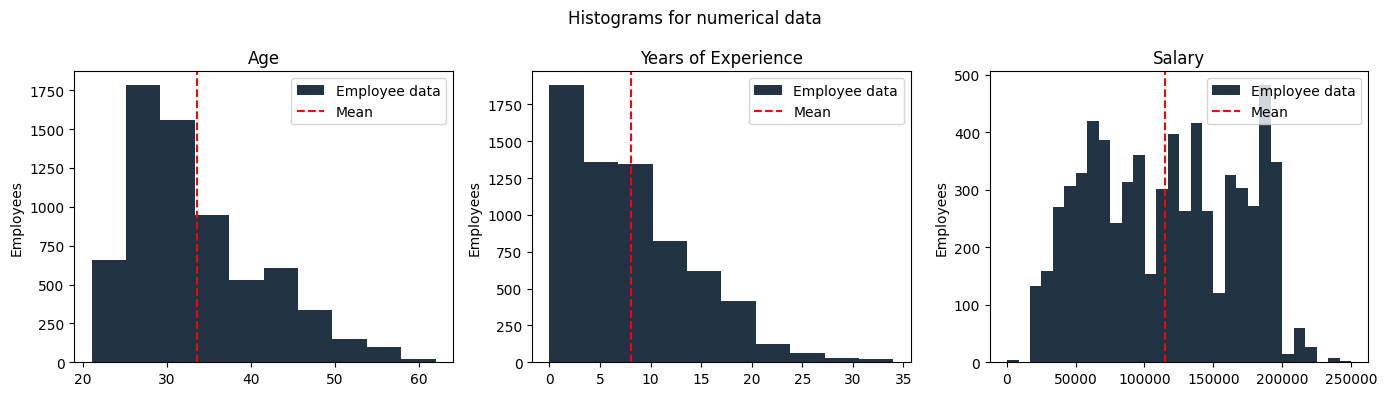

In [108]:
# Combined Histogram for numeric variables
c=['Age', 'Years of Experience', 'Salary'] # select numeric variables as column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,3, figsize=(14,4)) # 1 row, 3 columns
fig.suptitle('Histograms for numerical data',fontsize=12) # set tile
#set grid coordinates for subplots
cols=[0,1,2] # seqence of column positions
b=[10,10,30] # set bin sizes for each subplot separately
#loop through numeric data and draw histograms + indicate mean
for i in range(len(c)): #loop as many times as the number of elements in the variable 'c' storing column names
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on the predefined coordinates
    axs[cols[i]].hist(df[c[i]],bins=b[i],label="Employee data", color='#223344') # draw each histogram
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].axvline(mean, color="red", ls="--", label="Mean") #draw and stylise mean
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label
    axs[cols[i]].legend()

plt.tight_layout() #keep the text from overlapping
plt.show()

# Arranging multiple subplots (ref: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html)
# Get mean (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
# Matplotlib histograms (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
# Draw median (ref: https://python-graph-gallery.com/basic-histogram-in-matplotlib/)

#### 2.1.1 Analysis of the histograms of numeric variables

+ **Age:** There is one peak on the graph, indicating that this is an unimodal histogram. The peak showing left from the mean and most of the data tailing to the right, the histogram is right-skewed and shows clustering close to the lower age groups which in the context of the data means that the younger population is over-represented in the sample. The minimum age is 21, and the majority of individuals are likely in the relatively younger age range. That is in line with the summary statistics interquartile range of 28-38.

+ **Years of Experience:** For the obvious reasons (Experience accumulates with age.) this histogram is quite similar to the 'Age' histogram discussed above, however it appears much more right-skewed compared with 'Age'. Clustering around lower values indicates that the majority of employees likely have fewer years of experience and there is a significant number of entry-level employees indicated by the peak around the lower end of the graph close to 0 year experience. 

+ **Salary:** The histogram is generated with more bins to be able to better see the shape of the data, it appears to be a multimodal histogram with multiple peaks.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/)

#### 2.2 Visualizing categorical data from the dataset

Important characteristics of categorical variables that there is no hierarchical way of ordering these categories, and that they represent qualitative values therefore they cannot be represented on a numeric scale. Hence, a histogram is not always the most appropriate to analyse categorical data.<br>
A bar chart appears quite similar to histograms presenting categorical data with rectangular bars with heights or lengths proportional to the values that they represent. In the context of categorical data, this value is the frequency counts to the categories. A bar graph shows comparisons among discrete categories.

###### Bar Chart (ref: https://en.wikipedia.org/wiki/Bar_chart) <br> 8 easy plotting categorical variables with seaborn for Pandas Dataframe (ref: https://medium.com/@DemetrioCN/8-easy-plotting-categorical-variables-with-seaborn-for-pandas-dataframe-15bcdc10e99a) <br> Bar Chart (ref: https://www.jmp.com/en_nl/statistics-knowledge-portal/exploratory-data-analysis/bar-chart.html#:~:text=Bar%20charts%20make%20sense%20for,responses%20have%20a%20defined%20order.)

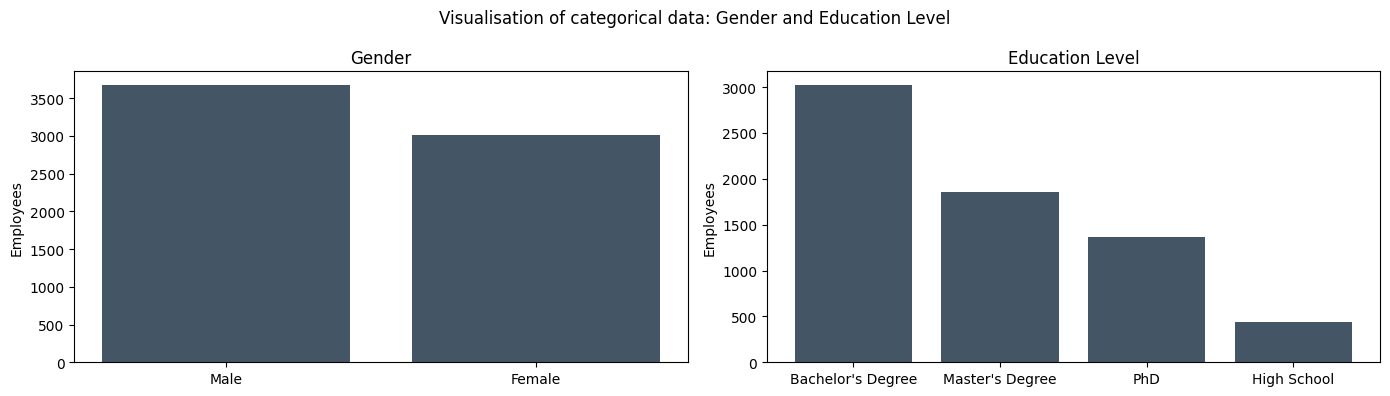

In [109]:
# Bar plots for categorical variables
c=['Gender', 'Education Level', 'Job Title'] # set column names from categorical variables
#set up plot for 2 charts ('Job titles displayed separately)
fig, axs = plt.subplots(1,2, figsize=(14,4)) # one row, 2 columns
fig.suptitle('Visualisation of categorical data: Gender and Education Level',fontsize=12)
#set grid coordinates for subplots
cols=[0,1]
#loop through data and draw histograms
for i in range(2):
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].bar(df[c[i]].value_counts().index, df[c[i]].value_counts(), color='#445566')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label

plt.tight_layout() #keep the text from overlapping
plt.show()

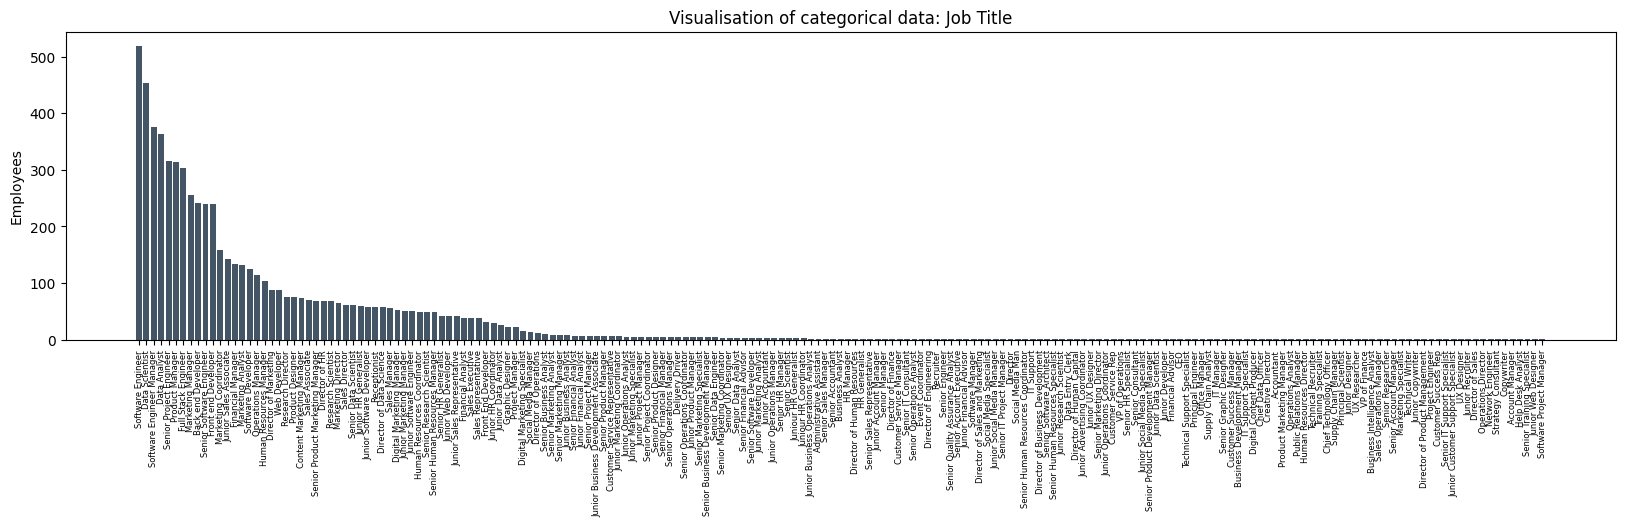

In [110]:
# generating separate plot for Job Title due to the large number of categories.
fig, axs = plt.subplots(figsize=(20,4))
#plot the bar chart, use .value_counts.index() to populate x axis with category names and .value_counts() for y axis to count occurances
plt.bar(df['Job Title'].value_counts().index, df['Job Title'].value_counts(), color='#445566') 
plt.xticks(rotation=90, fontsize=6) # rotate axis labels (ref: https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels)
plt.ylabel('Employees')  # Set y-axis label
plt.title('Visualisation of categorical data: Job Title',fontsize=12) # set title
plt.show()

# Matplotlib bar chart (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

### 2.2.1 Analysis of the bar charts of categorical data

+ **Gender:** After raws with 'Other' values have been removed, the bar chart shows two categories, with the "Male" category being the most prominent. 

+ **Education Level:** There are four categories with 'Bachelor's Degree' the most and 'High School' the least populous. 

+ **Job Title:** This variable has 191 distinct categories, some of them self-explanatory but many of them are difficult to interpret without detailed knowledge about the company's specific roles. For these reasons this variable is not likely to help with a deeper understanding of the relationships with other variables in the data. 


In [111]:
df = df.drop(columns='Job Title')

### 3. Investigating relationships between variables

#### 3.1 Correlation between numeric variables

As previously demonstrated 'Salary' has an interesting data distribution that doesn't follow any obvious pattern. Analysis of the relationships between the variables may reveal what are the main factors affecting salary distribution.<br>
Correlation measures the extent of a linear relationship between two variables. The correlation function (pandas.DataFrame.corr) returns the correlation coefficient (r) which is a numerical measure that measures the strength and direction of a linear relationship between two quantitative variables. The value ranges from -1 to 1 indicating the strength and direction of the relationship, with 0 representing no relationship at all. <br>
To visualize correlation, seaborn's heatmap plot is utilised, which plots a color-coded matrix representing the strength of the correlations with darker colour.

###### Correlation (ref: https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html) <br> Linear Relationships – Correlation (ref: https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/)<br> seaborn.heatmap (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

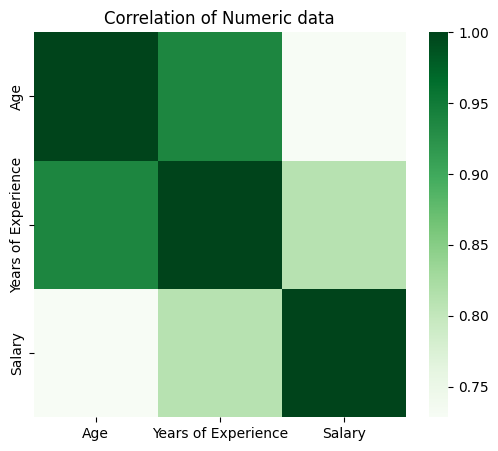

,Age,Years of Experience,Salary
Age,1.000000,0.937609,0.728343
Years of Experience,0.937609,1.000000,0.810942
Salary,0.728343,0.810942,1.000000


In [112]:
# Calculate correlations between Numeric data 
plotCorr=df[['Age','Years of Experience','Salary']].corr() # select numeric variables (.corr() does not support categorical data)
plt.figure(figsize=(6, 5)) # set plot size
sns.heatmap(plotCorr, cmap='Greens') # render heatmap to visualise correlation between variables (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)
plt.title("Correlation of Numeric data")
plt.show()
plotCorr # display the correlation matrix

#### 3.1.1 Correlation analysis

All three numeric variable show *strong* (0.7-0.9) to near *perfect* (1) positive correlations. <br>The relatively weakest correlation is between Age and Salary (0.73), while the strongest and nearly perfect correlation is unsurprisingly between Years of Experience and Age (0.94). <br>Apparently the salary amount is slightly more determined by Years of Experience (0.81) than Age (0.73).

###### User's guide to correlation coefficients (ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/) <br> Dancey and Reidy's (2004) correlation categorization. (ref:https://www.researchgate.net/figure/Dancey-and-Reidys-2004-correlation-categorization_tbl5_338938434)

#### 3.2 Pairwise relationships

The Pairplot enables the analysis of pairwise relationships between variables within a dataset, offering a visual summary of a large amount of data within a single figure. This is particularly helpful during the initial exploration of a dataset.
<br>
Seaborn's Pairplot, part of the Python Seaborn library, is used to create a grid of scatter plots and histograms or Kernel Density Estimations (KDE) if the function's hue parameter is defined, visualizing the pairwise relationships in a dataset. The comparison is made easier by having all pairs of measurements plotted side by side using subplots. Where the same measurement paired, a histogram or KDE is drawn. <br>

A KDE, instead of using bins to count observations like histograms, smooths the observations with a Gaussian kernel, producing a continuous density estimate, approximating the underlying probability density function. 

A scatter plot, which is the default visualization in Seaborn's pairplots, uses dots to represent values of two numeric variables, with each dot indicating the values of an individual data point on the horizontal and vertical axis. It is used to visualize relationships between variables.<br>

From the previous Correlation Analysis, we already established that the Salary amount is strongly correlates with Years of Experience (r=0.81, strong positive correlation) and Age (r=0.73, strong positive correlation). Seaborn's pairplot allows for a similar comparison, but it can also provide context using a categorical variable such as 'Gender' or 'Education Level' with the hue function that colour-codes the data according to the category values, providing further insight.

###### Seaborn Pairplot: Enhance Your Data Understanding with a Single Plot (ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22) <br> seaborn.pairplot (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html) <br> A Complete Guide to Scatter Plots (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/) <br> Kernel Density Estimation (KDE) (ref: https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial) <br> Creating Pair Plots in Seaborn with sns pairplot (ref: https://datagy.io/seaborn-pairplot/)

#### 3.2.1 Pairwise relationships in the context of Gender
The first categorical variable to examine is "Gender". The pairplots will provide insight weather the salary values in this sample are evenly distributed among the genders or there is evidence of gender based wage disparity. The 'gender pay gap' is a globally recognized phenomenon that refers to the average difference in remuneration between men and women in the workforce. It is influenced by various factors, including occupational segregation, differences in education and experience, and societal factors.

###### Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

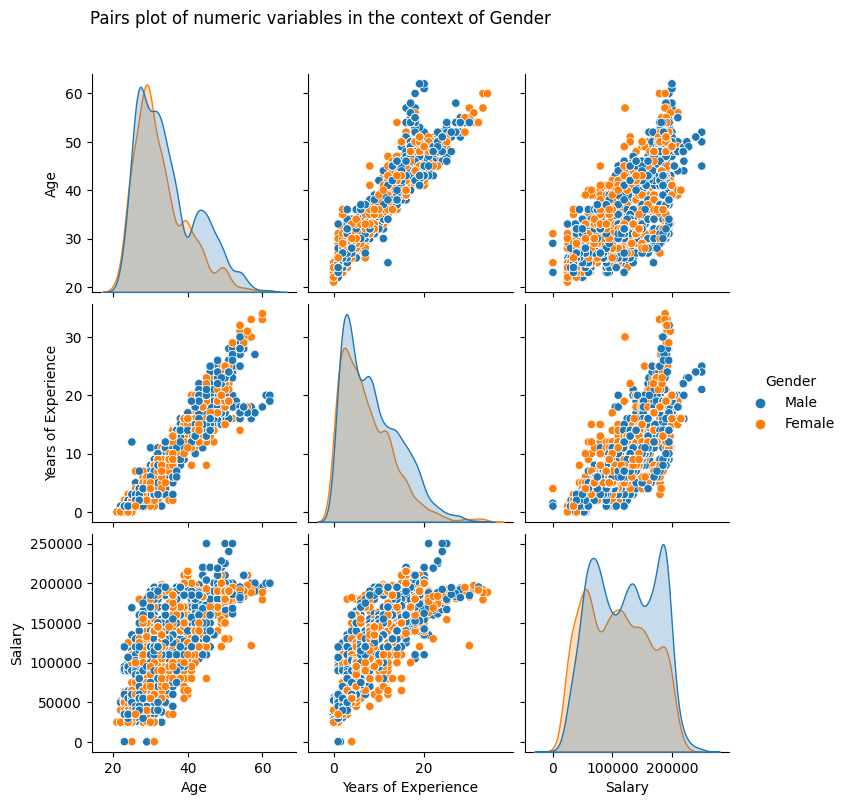

In [113]:
# Examine the data in the context of Gender
# Draw pairplots in with 'Gender' categories distinguished with colour.
context='Gender' # store variable name for reusability
sns.pairplot(df, hue=context, height=2.5) # pairplot with hue colour-coding Gender categories
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-1,y=3.3)
plt.show()

#Seaborn pairplots (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html)

#### 3.2.2 Analysis of pairplots in the context of the 'Gender' category

1. **Age:** 
    - a) Age on Age comparison in the context of Gender provides us with a KDE of the distribution of the Genders. It was already discussed in the previous Age histogram that most of the employees are in their twenties and thirties. It appears that genders are evenly distributed among the more populous demographic. However, as the age approaches the 50 mark, the number of male employees are visibly higher. Furthermore, it also reveals that the difference in the total number of male and female employees demonstrated in the bar charts previously is mainly due to the higher number of middle-aged men on the payroll. 
    - b) The scatter plot of Age vs Years of Experience demonstrates the previously discussed strong (r=0.74) positive linear relationship between the two variables, Notably, it also reveals that the older female employees have more Years of Experience compared with their male counterparts. 
    - c) On Age vs Salary the scatter plot shows signs of wage disparity with male employees getting the highest salaries regardless of their age and experience not being the highest, with an apparent glass ceiling for women at around 200k annual salary. Since Years of Experience has a stronger (r=0.81) positive correlation with Salary compared with Age (r=0.74) and correlation between Age and Years of Experience is almost perfect positive correlation (r=0.94) this observation indicates that Gender 'Female' may have a negative correlation with Salary.
2. **Years of Experience:** 
    - a) Years of experience vs Age confirms the already discussed points in section 1.a) and 1.c) above
    - b) Years on Experience plotted on itself shows that there are more male employees than female which is already established, and that the male employees in general have a little more Years of Experience. This could be explained with the previously noted discrepancy in employee demographic (higher number of older male employees) and the very strong positive correlation between Age and Years of Experience.
    - c) Years of Experience vs Salary reveals that while the most experienced employees are female, the highest salaries are paid to male employees. The result is counterintuitive since the highest positive correlation has been already demonstrated between Salary and Years of Experience. This phenomenon also could indicate a negative correlation between Salary and Gender. Analysing the data in another context such as Education Level could reveal more insight.
3. **Salary:** 
    - a) Both Salary vs Age and Salary vs Years of Experience shows the previously discussed positive linear relationships but also reveals the high earning male employees clearly separated from the trend.
    - b) Salary on Salary confirms the higher number of male employees compared with female as expected, however it also reveals that the female employees start with a slightly lower salary, there is a moderate peak at the medium salary value and continue to be represented less and less at the higher salary ranges. Meanwhile, the number of male employees peak at a higher entry-level salary, peak once more in around the middle (but higher than the female employees) and peak highest at the highest salary range. This indicates a positive correlation between 'Male' values in Gender and Salary. 

The results suggest that there is a wage disparity between the salaries of male and female employees which is in contradiction with the previously demonstrated positive linear correlations between numeric variables (Age and Years of Experience), indicatinfg a negative correlation between female gender and salary value and a positive between male gender and salary values. <br>
However, it must be noted that without the context of other variables such as 'Education Level', there is insufficient evidence to make the connection at this point of the analysis.<br>


#### 3.2.3 Pairwise relationships in the context of Education Level
For additional context, another set of pair plots generated to provide comparisons in the context of Education Levels. Higher education levels expected to correlate with higher salaries. 

###### Geographical Profiles of Income in Ireland 2016, Education (ref: https://www.cso.ie/en/releasesandpublications/ep/p-gpii/geographicalprofilesofincomeinireland2016/education/)

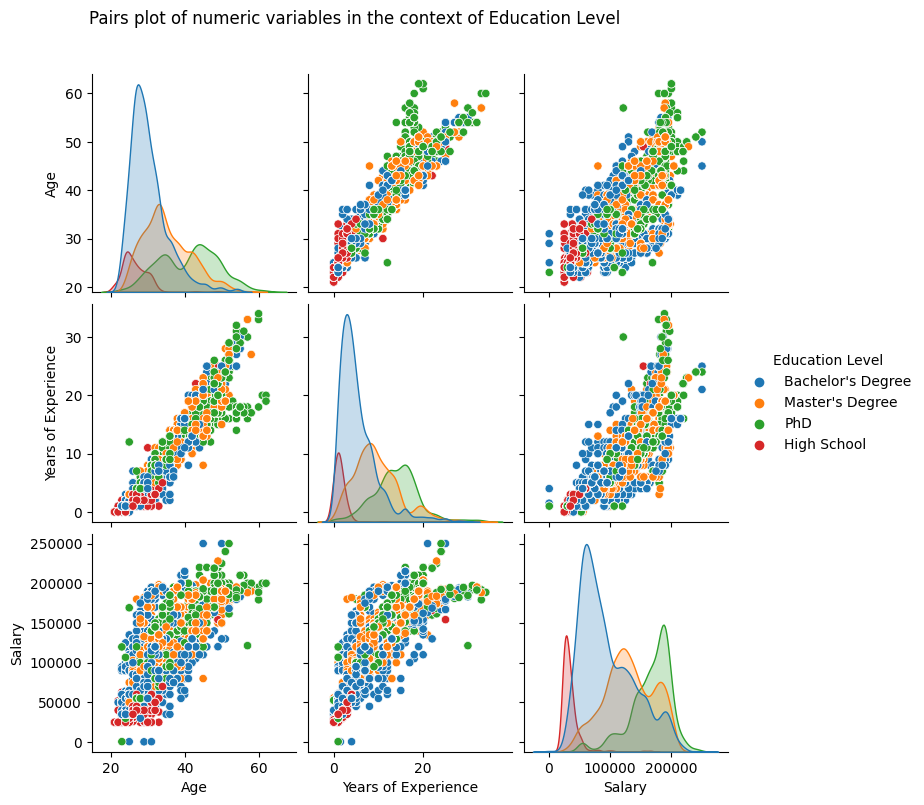

In [114]:
# Pairplots with Education Level context
context='Education Level'
sns.pairplot(df, hue=context, height=2.5)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-0.83,y=3.3)
plt.show()

#### 3.2.4 Analysis of pairplots in the context of the 'Education Level' category

1. **Age:** 
    - a) The Age on Age histogram, shows that the majority of the employees have Bachelor's Degrees clustering around the younger age range along with High School education, employee population with Masters and PhD are higher at a slightly older age with PhD having two peaks in the under 40 and over 40 population.
    - b) Age on Years of Experience shows once again the same linear relation discussed before. The number of employees with PhD is increasing toward the higher age and experience group.
    - c) Age on Salary plot in the context of education is not showing the same disparity as it did with gender. The highest earners (200k+) can have either Bachelor, Masters or PhD degrees. The mostly younger, High School educated population is massing around the lowest salaries, otherwise the rest of the salaries are distributed relatively evenly although with a bias toward Masters and PhD in the older and better paid population.
2. **Years of Experience:** 
    - a) Years of Experience on Age doesn't provide further insight other than their already established strong positive linear relationship.
    - b) The histogram on Years of Experience in the context of Education Level looks quite similar to the Age on Age subplot, the younger and the less educated employee population has the least experience while Masters and PhD employees have the most.
    - c) The scatter plot on Years of Experience vs Salary is very similar to the Age vs Salary subplot which is expected as their linear correlation are both very strong in the positive direction. Less experienced people getting lower pay but from Educational point of view, there is no obvious clustering.
3. **Salary:** 
    - a) Salary on Age and Salary on Years of Experience confirms their already discussed correlations.
    - b) The histogram of Salary on Salary in the context of Education Level confirms that the High School educated employee population gets the lowest salary with a sharp decline suggesting that almost none of them earn over 100k, while employees with Bachelor's degrees have a peak at the lower-mid salary range around 80k, however, the curve has a long tail indicating that a Bachelor's degree doesn't limit the maximum salary, in fact the highest earners in the company are with Bachelor's degrees. Employees with Master's massing around the mid-salary range and there is another peak close to the 200k mark, while PhD employees cluster at the highest salary range, with a long front-end possibly indicating part-time or advisory roles. However, detailed knowledge would be needed about the company to confirm this.

The pair plots' results, when considering Education Level, reveal an unexpected outcome. While there is a visible correlation between education levels and salaries, it does not demonstrate the strong positive correlation typically anticipated. The boundaries between different education levels and their corresponding salaries are not as clearly defined as one might expect.

#### 3.3 Analysis of the effects of Gender on Salary in the context of Education Levels with boxplots

It was demonstrated that while Gender has an apparent negative correlation or limiting affect on the Salary for female employees, the same effect was not as obvious in the context of Education Level. <br>To illustrate gender-based differences in salaries, the Level of Education is grouped by Gender on the Salary axis using Seaborn's categorical plot with box plots.<br>

Box plots are effective tools for visualizing the distribution of numeric data, particularly when conducting comparisons across multiple groups. They offer a high-level overview of essential statistical characteristics such as symmetry, skewness, variance, and the presence of outliers. Box plots offer a good visual representation on the central tendencies within the data, enabling efficient comparisons between different groups, based on five attributes; minimum, first quartile, median, third quartile and maximum. The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points. <br>


###### <img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" alt="Alt text" width="500" height="250"/> <p>*Image source: www.labxchange.org*</p>

The .catplot() function in Seaborn with the kind='box' parameter can plot multiple box plots for different category groups on the same plot, eliminating the need to create separate subplots. This feature streamlines the visualization process, making it more convenient when comparing groups or categories within the same plot.


###### Understanding Boxplots (ref: https://builtin.com/data-science/boxplot) <br> A Complete Guide to Box Plots (Ref: ˙ref: https://chartio.com/learn/charts/box-plot-complete-guide/) <br> Visualizing categorical data (ref: https://seaborn.pydata.org/tutorial/categorical.html) <br> How to interpret box plots (ref: https://www.labxchange.org/library/pathway/lx-pathway:a589f0bb-21ff-47bd-98ac-bd9cc96e299e/items/lb:LabXchange:d8863c77:html:1/59955)<br> seaborn.catplot (ref: https://seaborn.pydata.org/generated/seaborn.catplot.html)

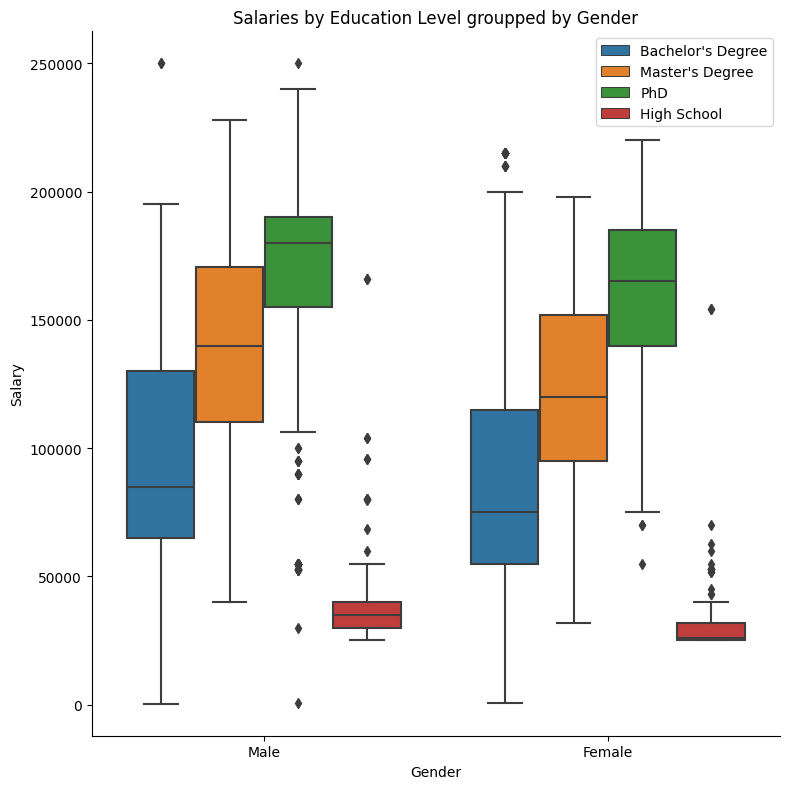

In [115]:
# generate categorical boxplots on the axis of Gender (x) and Salary (y) with Education Level hue
sns.catplot(data=df, x="Gender", y="Salary", hue='Education Level', height=8, kind='box',legend=False) 
plt.title("Salaries by Education Level groupped by Gender")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Visualizing categorical data (ref: https://seaborn.pydata.org/tutorial/categorical.html )
# categorical plot (ref: https://seaborn.pydata.org/tutorial/categorical.html)

#### 3.3.1 Analysis of Education Level on the axis of Salary grouped by Gender with box plots.

The relation of box charts between education levels appear quite similar within their separate gender group, demonstrating that the Education Level do correlate with the salaries. However, when comparing the two Gender groups, it is evident that the Female group has generally lower starting points and lower end points. The bulk of the salaries (the central 50%) and also the median mark appears higher in the Male group compared with the Female group across all Education Levels. There is no category where female employees have the advantage except for a few outliers in the "Bachelor's Degree" category. <br>
There is a visible limit regarding the highest possible salary for female employees. This is especially evident when we look at the almost identical endpoints at 200,000 for female employees with Bachelor's and Master's degrees while the same in their male counterparts show a liner progress. This demonstrates a glass ceiling which is a term referring to a metaphorical invisible barrier that prevents certain individuals from being promoted to managerial- and executive-level positions within an organization or industry. 

###### The Glass Ceiling: Definition, History, Effects, and Examples (Ref: https://www.investopedia.com/terms/g/glass-ceiling.asp#:~:text=The%20glass%20ceiling%20is%20a,at%20a%201978%20Women's%20Exposition.) <br> Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

### 4. Summary of data analysis

The data analysis concludes that the main factors in achievable salaries in the company are Years of Experience tied with Age, both showing very strong positive correlations, while there is a demonstrable positive correlation with higher Education Level as well. The analysis also revealed however, that there is a wage disparity between female and male employees, and female workers have a hard time pushing through a glass ceiling at around the 200,000 mark regardless of their Age, Years of Experience or education Level.

### 5. Genarating synthetic dataset that is simulating the real world data from the analysed dataset.

Synthetic data can be defined as artificially annotated information generated by computer algorithms or simulations. Synthetic data reduces constraints presented by using regulated or sensitive data. It can also fulfil specific requirements which can’t be attained with authentic data. Disadvantages of synthetic data include challenges in replicating the complexity of the original data and its limited ability to directly substitute authentic data. Accurate data is still necessary for generating meaningful results.<br>
Synthetic data, can be created based on an agent or model representing elements within the system interacting with each other following pre-defined rules and create the data based on these rules. <br><br>
Another way to generate synthetic data is by observing the statistical distribution of data and generate synthetic data based on the same distribution. Informally, visualizing the shape of the data provides a quick sense of its distribution. This method involves producing a random sample that adheres to a predefined probability distribution, such as the Normal, Exponential, Gamma, lognormal, Uniform or KDE distribution.<br>
Various other methods such as generative models, bootstrapping and many others are also in use for synthetic data creation, however, understanding the underlying probability distribution is key to choosing an appropriate statistical model for generating synthetic data. <br>
Synthetic data has its challenges and limitations. The generated data can only resemble real-world data and the quality of synthetic data is significantly associated with the quality of the donor data and the model used to generate the data.<br>

###### Synthetic Data Generation: Definition, Types, Techniques, and Tools (ref: https://www.turing.com/kb/synthetic-data-generation-techniques) <br> Synthetic Data — key benefits, types, generation methods, and challenges (ref: https://towardsdatascience.com/synthetic-data-key-benefits-types-generation-methods-and-challenges-11b0ad304b55) <br> Synthetic Data Generation: Techniques and Considerations (ref: https://www.questionpro.com/blog/synthetic-data-generation/#:~:text=Generating%20synthetic%20data%20according%20to%20distribution&text=This%20method%20involves%20generating%20points,rather%20than%20actual%20data%20points.) <br> Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html) <br> Separate data into multiple distribution (ref: https://medium.com/@adev94/how-to-split-multimodal-distribution-with-gaussian-mixture-models-in-python-c87957553e4)<br> NumPy Random Generator (Ref: https://numpy.org/doc/stable/reference/random/generator.html)<br> Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html) <br> Kernel Density Estimator explained step by step (ref: https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517)


#### 5.1 Generating 'Age' variable with gamma distribution 

The Gamma Distribution is continuous probably distribution defined by two parameters; shape and scale. The shape determines the curve, the scale influences the spread of the curve.
Based on the significantly right skewed shape of the 'Age' histogram a Gamma Distribution could be suitable to model the data.

###### Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html) <br> numpy.random.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

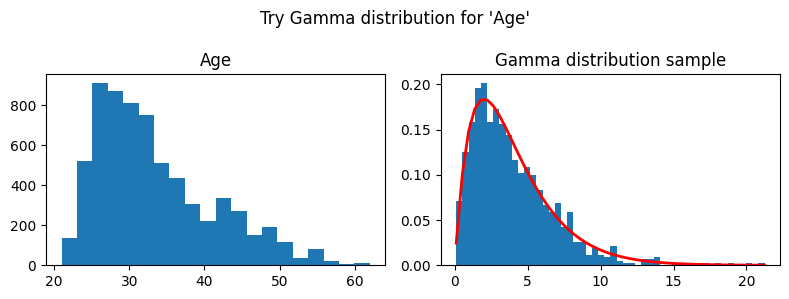

In [116]:
# Test Gamma distribution and 'Age'

#set plot and subplots
fig, axs = plt.subplots(1,2, figsize=(8,3)) # 1 row, 2 columns
fig.suptitle("Try Gamma distribution for 'Age'",fontsize=12)
# draw 'Age' histogram
axs[0].hist(df['Age'], bins=20)
axs[0].set_title('Age')

#------ sample taken from NumPy documentation---------------#
# draw Gamma distribution taking direct copy from sample from ref NumPy (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
#import scipy.special as sps  # already loaded
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
axs[1].plot(bins, y, linewidth=2, color='r')  # sample modified to accomodate 2 histograms side by side.
axs[1].set_title('Gamma distribution sample')
plt.tight_layout()
plt.show()

The two shapes appear to be similar, further adjustments on shape and scale parameters in np.random.gamma may increase the resemblance 

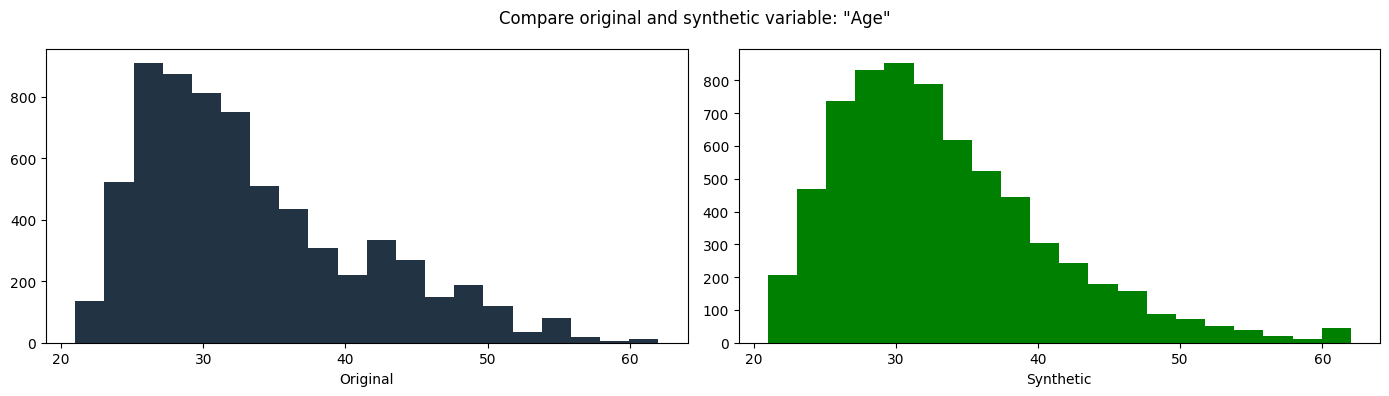

In [117]:
# Simulation of 'Age' variable

size=df['Age'].count() #set size for np.random.gamma
# adjust varaibles for Gamma's shape and scale parameters calculationg from the donor data similar shape with (trial and error, visual confimration.)
ageShape=(df['Age'].mean())/11 # calculate shape parameter from mean
ageScale=(df['Age'].std())/1.8 # calcualtre scale from std
# Generate Gamma distribution based on original data - 
age_model = np.random.gamma(shape=ageShape, scale=ageScale, size=size) 
#Convert gamma results to employee age data by fitting the distribution model on the donor characteristics 
age_data = np.clip(age_model+df['Age'].min(),0,df['Age'].max()) #clip by minimum and maximum age
#Create a DataFrame with a column 'Age_synth' to store generated synthetic data
df_synth = pd.DataFrame({'Age_synth': age_data}) # create Age_synth column with generated age data
#assign datatype (int) to get realistic age figures instead of floats
df_synth['Age_synth'] = df_synth['Age_synth'].astype(int)  
#Check and compare resulting data distribution
#set plot for 2 charts
fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 2 columns
fig.suptitle('Compare original and synthetic variable: "Age"',fontsize=12) # set title
# draw histograms
axs[0].hist(df['Age'],bins=20, color='#223344') #Original data from donor dataframe
axs[1].hist(df_synth['Age_synth'],bins=20, color='g') #Synthetic data from the created synthetic dataframe
# set subplot titles
axs[0].set_xlabel('Original')
axs[1].set_xlabel('Synthetic')
plt.tight_layout() #keep the text from overlapping
plt.show()
# NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
# clipping synthetic results to fit within variable characteristics (ref: https://sparkbyexamples.com/numpy/numpy-clip-function/)
#assign datatype (ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [118]:
# Compare and verify Summary Statistics for the two variables.
compareDF = pd.DataFrame({'Real_Age': df['Age'], 'Synthetic_Age': df_synth['Age_synth']}) 
compareDF.describe()
# Merge columns to dataframe (ref: https://saturncloud.io/blog/how-to-merge-two-dataframe-columns-into-one-in-pandas/#:~:text=Merging%20Two%20Columns%20of%20a%20DataFrame&text=In%20this%20example%2C%20we%20first,in%20the%20original%20DataFrame%20df%20.)

,Real_Age,Synthetic_Age
count,6684.000000,6684.000000
mean,33.610563,33.485039
std,7.595994,7.305229
min,21.000000,21.000000
25%,28.000000,28.000000
50%,32.000000,32.000000
75%,38.000000,37.000000
max,62.000000,62.000000


The resulting data distribution for 'Age_synth' resembles the original 'Age' shape. Age_synth is added to the synthetic dataset. Summary statistics for the two variables are very similar. The method is encapsulated in a function 'fn_Age_sym()' for reusability.

In [119]:
# encapsulate 'Age' data synthesis for reusability
def fn_Age_sym():
    size=df['Age'].count()
    ageShape=(df['Age'].mean())/10
    ageScale=(df['Age'].std())/2.5
    age_model = np.random.gamma(shape=ageShape, scale=ageScale, size=size)
    age_data = np.clip(age_model+df['Age'].min(),0,df['Age'].max()).astype(int)
    return(age_data)

#### 5.2 Generating 'Years of Experience' variable with gamma distribution 

Considering the previously demonstrated (3.1) strong positive correlation between 'Age' and 'Years of Experience', the first distribution model to try is once again a Gamma distribution as it proven to be suitable for the 'Age' variable previously (5.1).

###### Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html) <br> numpy.random.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

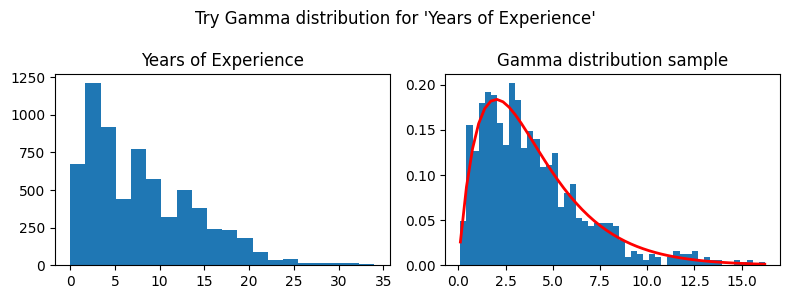

In [120]:
# Test Gamma distribution for 'Years of Experience'

#set plot and subplots
fig, axs = plt.subplots(1,2, figsize=(8,3)) # 1 row, 2 columns
fig.suptitle("Try Gamma distribution for 'Years of Experience'",fontsize=12)
# draw 'Age' histogram
axs[0].hist(df['Years of Experience'],bins=20)
axs[0].set_title('Years of Experience')
# draw Gamma distribution using sample from ref NumPy
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
###----
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
axs[1].plot(bins, y, linewidth=2, color='r')  
axs[1].set_title('Gamma distribution sample')
plt.tight_layout()
plt.show()

The two shapes look similar. With further adjustments on shape and scale parameters it may be possible to get a closer match.

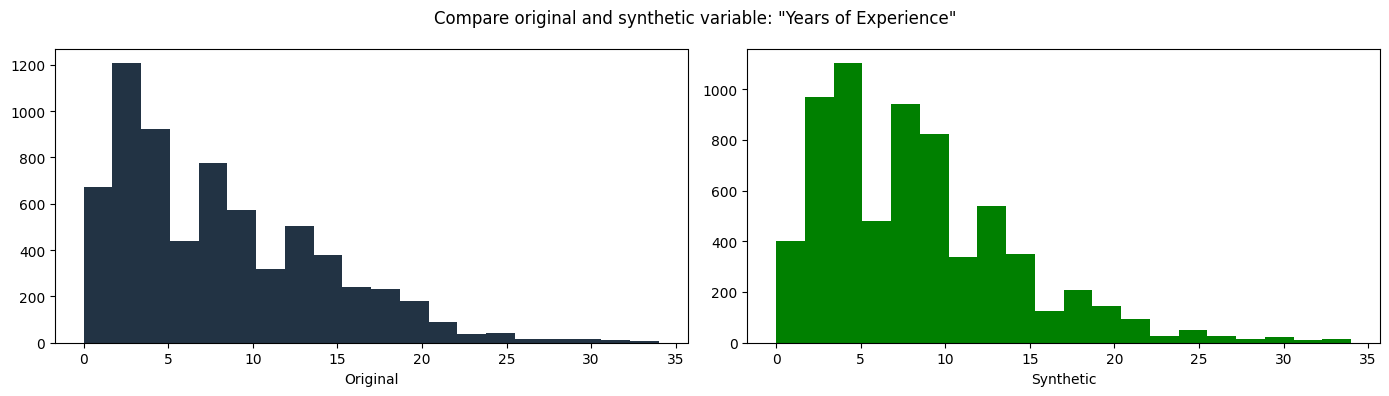

In [121]:
# Simulation of 'Years of Experience' variable

size=df['Years of Experience'].count() # set size for gamma distribution method
# manually adjust varaibles for Gamma's shape and scale parameters (trial and error, visual confimration.)
yexp_model = np.random.gamma(shape=2.3, scale=3.85, size=size) 
#clip synth data to match original variable's min and max
yexp_data = np.clip(yexp_model+df['Years of Experience'].min(),0,df['Years of Experience'].max())
# add  synthetic variable to synthetic dataframe
df_synth['Years of Experience_synth'] = yexp_data.astype(int) #assign datatype (int) for realistic year figures
#set up plot for 2 charts-------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 2 columns
fig.suptitle('Compare original and synthetic variable: "Years of Experience"',fontsize=12)
# draw histograms
axs[0].hist(df['Years of Experience'],bins=20,label="Original", color='#223344') # Original data
axs[1].hist(df_synth['Years of Experience_synth'],bins=20,label="Synthetic", color='g') # Synthetic data
# set titles
axs[0].set_xlabel('Original')
axs[1].set_xlabel('Synthetic')
plt.tight_layout() #keep the text from overlapping
plt.show()
#NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

In [122]:
# Compare and verify Summary Statistics for the two variables.
compareDF = pd.DataFrame({'Real_Years of Experience': df['Years of Experience'], 'Synthetic_Years of Experience': df_synth['Years of Experience_synth']})
compareDF.describe()
# Merge columns to dataframe (ref: https://saturncloud.io/blog/how-to-merge-two-dataframe-columns-into-one-in-pandas/#:~:text=Merging%20Two%20Columns%20of%20a%20DataFrame&text=In%20this%20example%2C%20we%20first,in%20the%20original%20DataFrame%20df%20.)

,Real_Years of Experience,Synthetic_Years of Experience
count,6684.000000,6684.000000
mean,8.077723,8.369838
std,6.029305,5.740508
min,0.000000,0.000000
25%,3.000000,4.000000
50%,7.000000,7.000000
75%,12.000000,11.000000
max,34.000000,34.000000


The resulting data distribution for 'Years of Experience_synth' resembles the original 'Years of Experience' shape. Summary statistics for the two variables are similar. Years of Experience_synth is added to the synthetic dataset. The method is encapsulated in a function 'fn_YExp_sym()' for reusability.

In [123]:
# encapsulate 'Years of Experience' data synthesis
def fn_YExp_sym():
    size=df['Years of Experience'].count()
    yexp_model = np.random.gamma(shape=2.3, scale=3.85, size=size)
    yexp_data = np.clip(yexp_model+df['Years of Experience'].min(),0,df['Years of Experience'].max()).astype(int)
    return(yexp_data)

#### 5.3 Simulating 'Salary' data with KDE

Salary data is a multimodal variable and attempts to create a singular random distribution model using gaussian, gamma or other distributions were not satisfactory.<br>
Python's Gaussian_KDE from the SciPy package is using a composit of Gaussian Probability Distributions to represent a kernel-density estimate (KDE). It works by placing a kernel (a Gaussian Distribution function) at each data point and summing up these kernels to create a smooth estimate of the underlying distribution. The kernel function is evaluated for each datapoint separately, and these partial results are summed to form the KDE.
After the KDE is generated, SciPy's *gaussian_kde.resample()* function creates a random dataset of a given size that has a similar shape to the original data. Kernel density estimations are dependent on an arbitrary bandwidth which governs how smooth is the returned approximation. The lower the bandwidth the narrower are the kernels and the resulting curve less smooth.

###### Kernel Density Estimator explained step by step (ref: https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517) <br> How to use Python Scipy Gaussian_Kde (ref: https://pythonguides.com/python-scipy-gaussian_kde/) <br> Modality tests and kernel density estimations (ref: https://towardsdatascience.com/modality-tests-and-kernel-density-estimations-3f349bb9e595) <br> scipy.stats.gaussian_kde (ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)

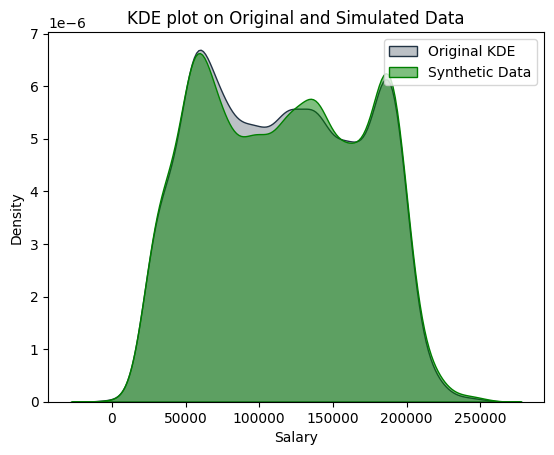

In [124]:
# https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517
# https://pythonguides.com/python-scipy-gaussian_kde/

# Test gaussian KDE (from SciPy) with 'Salary' variable
#changed default KDE bandwidth (0.2) to get better matching synthetic data (the lower the number the more accurate (less smooth) is the result.
kde = gaussian_kde(df['Salary'],bw_method=0.02) 
# Generate synthetic 'Salary' data by sampling from the KDE
salary_data = kde.resample(size=df['Salary'].count()) #kde.resample() - Randomly sample a dataset from the estimated PDF, size is 'Salary'.
salary_data = salary_data.flatten() #The resample method returns a 2D array, flatten converts it to a 1D array (KDE didn't work otherwise)
# Plot KDE curves with original and the resampled data
sns.kdeplot(df['Salary'], fill=True, color='#223344', label='Original KDE',alpha=0.3)
sns.kdeplot(salary_data, fill=True, color='green', label='Synthetic Data',alpha=0.5)
# Add labels and title
plt.title('KDE plot on Original and Simulated Data')
plt.xlabel('Salary')
plt.ylabel('Density')
# Show the plot 
plt.legend()
plt.show()
#- its Batman! :o

The overlay visualization of the two variables shows an almost perfect match. The KDE method is encapsulated in 'fn_Salary()'. The synthetic variable is added to the synthetic dataframe.

In [125]:
# encapsulate Salary synth

def fn_Salary():
    # gaussian KDE
    kde = gaussian_kde(df['Salary'],bw_method=0.02)
    salary_model = kde.resample(size=df['Salary'].count()) 
    salary_data = np.clip(salary_model+df['Salary'].min(),0,df['Salary'].max()) #clip results to avoid negative salary figures
    #The resample method returns a 2D array, flatten converts it to a 1D array (KDE didn't work otherwise)
    salary_data = salary_data.flatten().astype(int) 
    return(salary_data)

,Real_Salary,Synthetic_Salary
count,6684.000000,6684.000000
mean,115307.175194,115079.264961
std,52806.810881,53081.228201
min,350.000000,585.000000
25%,70000.000000,69283.000000
50%,115000.000000,114401.500000
75%,160000.000000,160647.250000
max,250000.000000,242221.000000


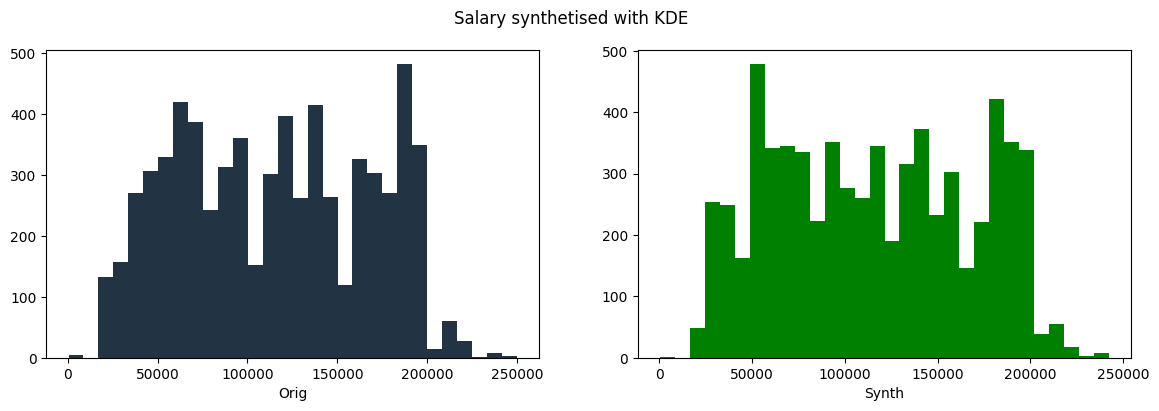

In [126]:
#plt.hist(synthetic_data.flatten(), bins=30)
synthetic_data=pd.DataFrame(fn_Salary())
synthetic_data=synthetic_data.astype(int)
df_synth['Salary_synth']  = synthetic_data
#synthFemale_df = pd.DataFrame(synthetic_data.flatten(), columns=['SynthFem'])
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Salary synthetised with KDE', fontsize=12)

axs[0].hist(df['Salary'], bins=30, color='#223344')
axs[1].hist(df_synth['Salary_synth'], bins=30, color='g')
axs[0].set_xlabel('Orig')
axs[1].set_xlabel('Synth')

# Compare and verify Summary Statistics for the two variables.
compareDF = pd.DataFrame({'Real_Salary': df['Salary'], 'Synthetic_Salary': df_synth['Salary_synth']}) 
compareDF.describe()

The resulting data distribution for 'Salary_synth' very closely resembles the original 'Salary' shape even on a high (bins=30) resolution histogram. Summary statistics for the two variables are very similar.

### 5.4 Simulate 'Gender' with random choice

The NumPy random choice() function is a built-in function in the NumPy package of Python. The NumPy random.choice() function Generates a random sample from a given 1-D array. The function's probability (p=) parameter allows for preserving the original gender distribution when synthesizing new data.

###### NumPy random choice (ref: https://www.educba.com/numpy-random-choice/) <br> numpy.random.choice (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)<br> Empirical Distributions (ref:https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf)

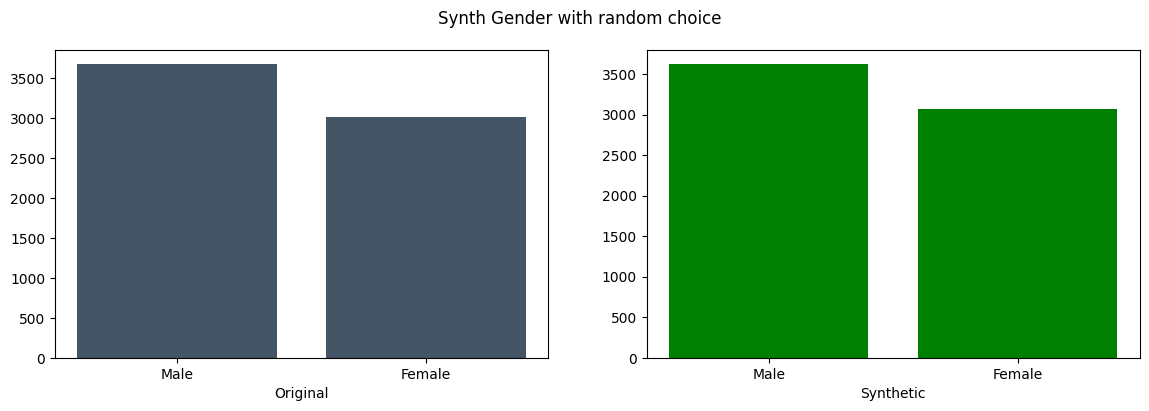

probabilities: ['Male' 'Female'] 0.55


,Real_Gender,Synthetic_Gender
count,6684,6684
unique,2,2
top,Male,Male
freq,3671,3619


In [127]:

# get probabilities based on proportions in the original data
males=df['Gender'].str.count('Male').sum() # count occurances ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html
maleprob=round(males/df['Gender'].count(),2) #male probability -  
#rounded to two digits to allow some variations (otherwise its always the same result in random choice)

#genderSynth=np.random.choice(df['Gender'].unique(), df['Gender'].count(),p=[maleprob,1-maleprob])
genderSynth=np.random.choice(df['Gender'].unique(), df['Gender'].count(),p=[maleprob,1-maleprob])

# add to the synthesised dataframe
df_synth['Gender_synth']  = genderSynth

# visualise original and synthetic data
fig, axs = plt.subplots(1,2, figsize=(14,4)) # one row, 2 columns
fig.suptitle('Synth Gender with random choice',fontsize=12)

# bar charts were showing incorrect data (bars and category lables were not in order, 
    # histograms were correct but appeared in random order. Sorting by frequency and indexing the categories fixed the problem.
sorted_df = df['Gender'].value_counts().index
sorted_df_synth = df_synth['Gender_synth'].value_counts().index

# Plot a bar chart with sorted categories for both original and synthetic data
axs[0].bar(sorted_df, df['Gender'].value_counts()[sorted_df], color='#445566')  # Orig
axs[1].bar(sorted_df_synth, df_synth['Gender_synth'].value_counts()[sorted_df_synth], color='g')  # Synth
#axs[0].bar(df['Gender'].unique(),df['Gender'].value_counts(), color='#445566') #Orig
#axs[1].bar(df_synth['Gender_synth'].unique(),df_synth['Gender_synth'].value_counts(), color='g') #Synth

axs[0].set_xlabel('Original')
axs[1].set_xlabel('Synthetic')
plt.show()
print("probabilities:",df['Gender'].unique(), maleprob)
# Compare and verify Summary Statistics for the two variables.
compareDF = pd.DataFrame({'Real_Gender': df['Gender'], 'Synthetic_Gender': df_synth['Gender_synth']})
compareDF.describe()

The two variables are almost identical. 'Gender_synth' added to the synthetic dataframe. Random choice method encapsulated in a reusable function fn_randCho(c) where (c) passes the name of the categorical variable in the dataframe. This allows for flexible reusability.

In [139]:
# Encapsulate random choice - modified for universal use
def fn_randCho(c):
    cats=[] #create category list container for category names
    for i in df[c].unique(): # loop for the number of unique items in the variable
        cats.append(i) #popualate the category list from unique categories within the varaible
    # get probabilities based on proportions in the original data
    probs=[] # create probability container
    for i in range(len(cats)): # loop for the number of categories
        subtots=df[c].str.count(cats[i]).sum() #subtotal the occurance of each category
        count=df[c].count()# count the total number of categories
        probs.append(round(subtots/count,2)) # get distribution by dividing the subtotals with the total. 
            # also rounded to two digits to allow some variations (otherwise results are too similar)

    synth=np.random.choice(df[c].unique(), df[c].count(),p=probs) # run random choice with the calculated parameters
    #print("probabilities:",cats, probs)
    return(synth) # return result

### 5.5 Simulate 'Education Level' with random choice

As the 'Education Level' variable similar to the 'Gender' in a sense that it has only a few categories, random choice distribution was tested to simulate the data. The previously created fn_randcho(c) function can be used with any categorical data in the dataframe.

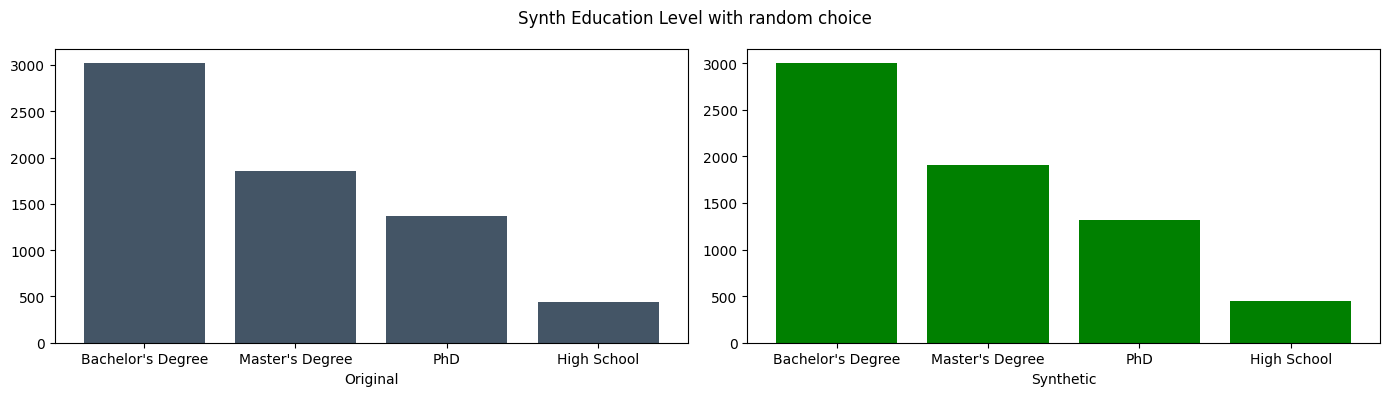

,Real_Education Level,Synthetic_Education Level
count,6684,6684
unique,4,4
top,Bachelor's Degree,Bachelor's Degree
freq,3021,3003


In [140]:
# simulate 'Education Level' with fn_randCho(c) random choice function
eduSynth=fn_randCho("Education Level")

# add result to the synthesised dataframe
df_synth['Education Level_synth']  = eduSynth

# visualise original and synthetic data
fig, axs = plt.subplots(1,2, figsize=(14,4)) # one row, 2 columns
fig.suptitle('Synth Education Level with random choice',fontsize=12)

# fix random bar issue in bar chart.
sorted_df = df['Education Level'].value_counts().index
sorted_df_synth = df_synth['Education Level_synth'].value_counts().index

# Plot a bar chart with sorted categories for original and synthetic data
axs[0].bar(sorted_df, df['Education Level'].value_counts()[sorted_df], color='#445566')  # Orig
axs[1].bar(sorted_df_synth, df_synth['Education Level_synth'].value_counts()[sorted_df_synth], color='g')  # Synth
#set labels
axs[0].set_xlabel('Original')
axs[1].set_xlabel('Synthetic')
plt.tight_layout()
plt.show()
# Compare and verify Summary Statistics for the two variables.
compareDF = pd.DataFrame({'Real_Education Level': df['Education Level'], 'Synthetic_Education Level': df_synth['Education Level_synth']}) 
compareDF.describe()

The two variables are almost identical n shape and in summary statistics. 'Education Level_synth' added to the synthetic dataframe. 

### 6. Summary Comparison: Validating Original and Synthetic Variable Characteristics, and confirming Method Reusability
After synthesizing individual variables, a side-by-side visualization is created to verify if the original and synthetic representations appear similar. This analysis aims to confirm that the datasets resemble each other and to ensure that the synthesis methods are working as expected. Additionally, a subsequent assessment validates that the synthesizer functions are reusable and are able to successfully and consistently re-generate the synthetic datasets.

In [130]:
#Rearrange column sequence to match original for the visualisation
df_synth=df_synth.reindex(columns=['Age_synth', 'Gender_synth', 'Education Level_synth', 'Years of Experience_synth', 'Salary_synth']) 
#reorder dataframe (reindex ref: https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns)
df.columns # get original varable names

Index(['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary'], dtype='object')

In [131]:
df_synth.columns # verify variables in the correct order.

Index(['Age_synth', 'Gender_synth', 'Education Level_synth',
       'Years of Experience_synth', 'Salary_synth'],
      dtype='object')

#### 6.1 Summary Comparison - Histograms

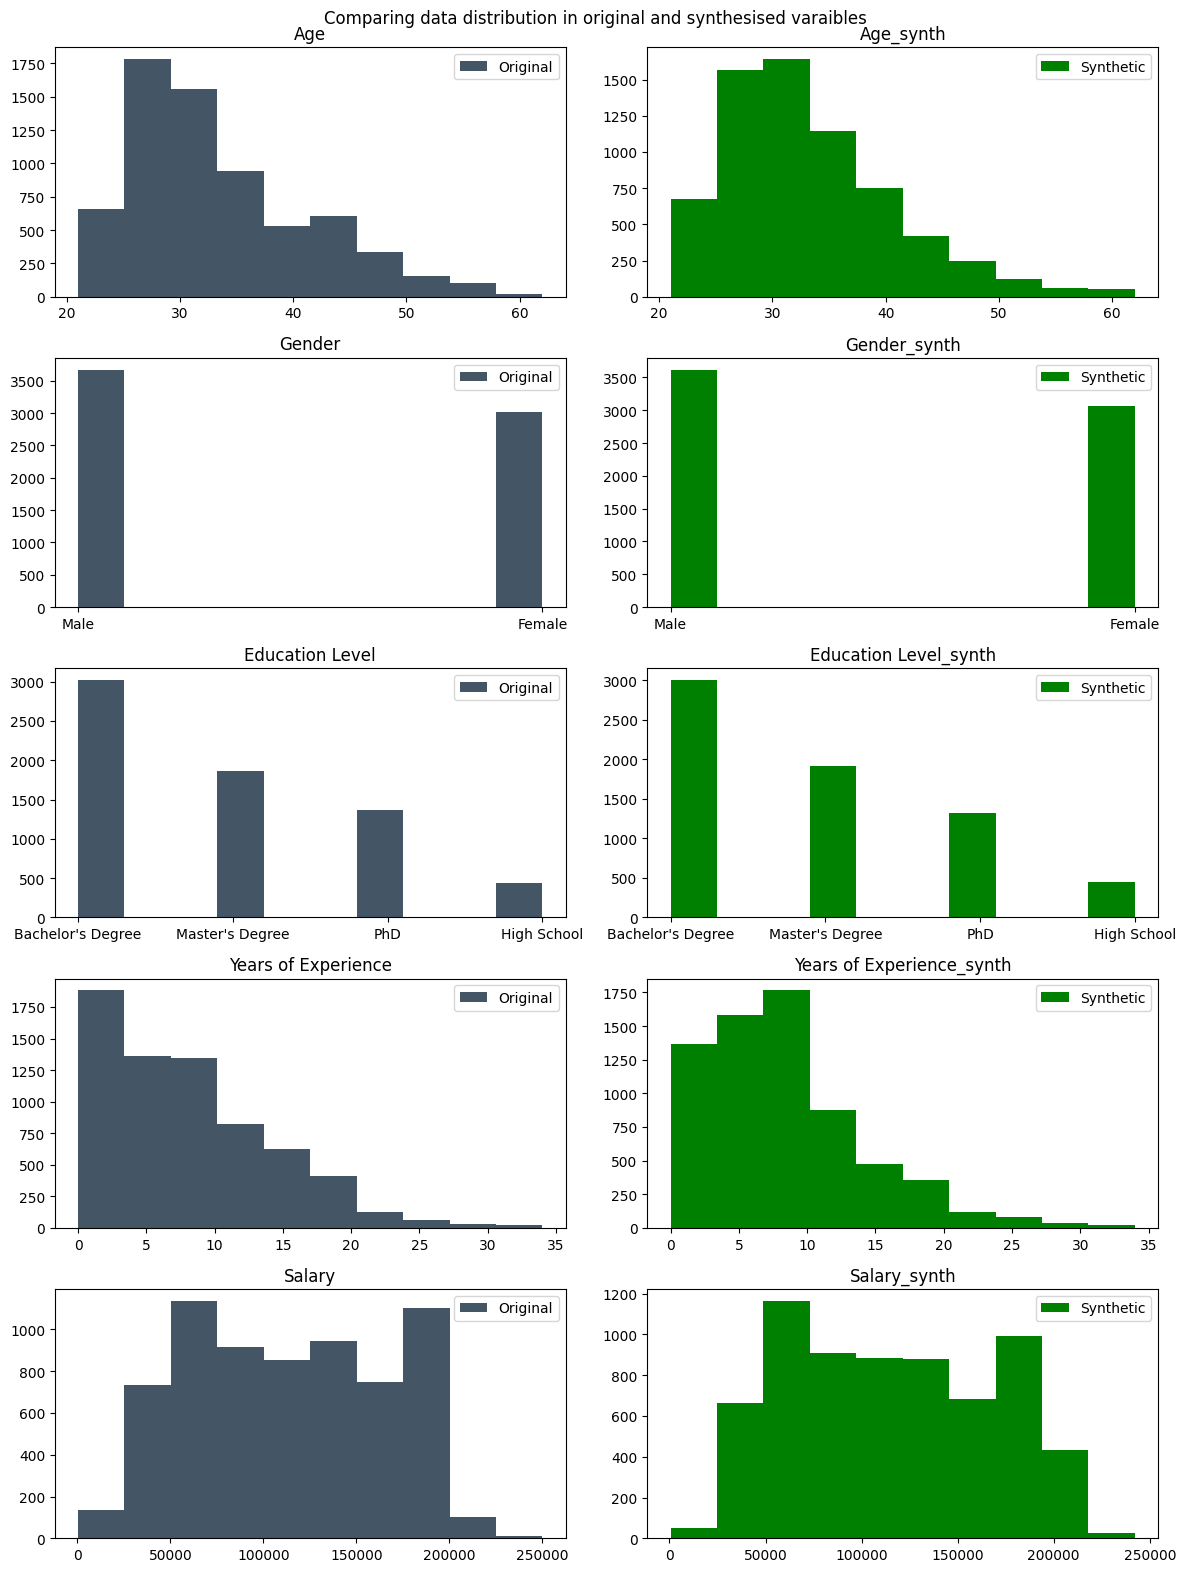

In [142]:
# individual comparison of each varaible
c=df.columns # get original column names
cs=df_synth.columns # get synthesised column names
fig, axs = plt.subplots(5,2, figsize=(12,16))
fig.suptitle('Comparing data distribution in original and synthesised varaibles',fontsize=12)
#set grid coordinates for looped subplots
rows=[0,1,2,3,4]
#loop through each variable in their respective dataframe and draw histogram
for i in range(len(c)):
    # original
    axs[rows[i],0].hist(df[c[i]],bins=10,label="Original",color='#445566')
    axs[rows[i],0].set_title(c[i])
    axs[rows[i],0].legend()
    # synthetic
    axs[rows[i],1].hist(df_synth[cs[i]],bins=10,label="Synthetic",color='g')
    axs[rows[i],1].set_title(cs[i])
    axs[rows[i],1].legend()
plt.tight_layout()
plt.show()

The generated histograms confirm that the synthetic data closely mirrors the shape and characteristics of the original. A minor irregularity is observed in the histograms of the two categorical variables, likely due to random variations. Nevertheless, the bar lengths appear correct, although not in the correct order, corresponding to the values in the original data, indicating overall consistency.

#### 6.1 Summary Comparison - Summary statistics

In [133]:
#Generate Summary statistics for both original and synthetic data for comparison.
print("Original DataFrame:")
df.describe(include='all')

Original DataFrame:


,Age,Gender,Education Level,Years of Experience,Salary
count,6684.000000,6684,6684,6684.000000,6684.000000
unique,NaN,2,4,NaN,NaN
top,NaN,Male,Bachelor's Degree,NaN,NaN
freq,NaN,3671,3021,NaN,NaN
mean,33.610563,NaN,NaN,8.077723,115307.175194
std,7.595994,NaN,NaN,6.029305,52806.810881
min,21.000000,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,12.000000,160000.000000


In [134]:
print("\nSynthetic DataFrame:")
df_synth.describe(include='all')


Synthetic DataFrame:


,Age_synth,Gender_synth,Education Level_synth,Years of Experience_synth,Salary_synth
count,6684.000000,6684,6684,6684.000000,6684.000000
unique,NaN,2,4,NaN,NaN
top,NaN,Male,Bachelor's Degree,NaN,NaN
freq,NaN,3619,2946,NaN,NaN
mean,33.485039,NaN,NaN,8.369838,115079.264961
std,7.305229,NaN,NaN,5.740508,53081.228201
min,21.000000,NaN,NaN,0.000000,585.000000
25%,28.000000,NaN,NaN,4.000000,69283.000000
50%,32.000000,NaN,NaN,7.000000,114401.500000
75%,37.000000,NaN,NaN,11.000000,160647.250000


The summary statistics for the synthetic dataset, covering Age, Gender, Education Level, Years of Experience, and Salary, closely resemble the original dataset. The counts, unique values, top frequencies, means, standard deviations, and other statistics show a strong similarity, confirming the accuracy of the synthetic data generation process.

#### 6.3 Functionality test for synthesiser routines

In the data synthesis from the original dataset, four synthesiser functions were developed:
- fn_Age_sym() and fn_YExp_sym(): These functions apply a gamma distribution model to generate synthetic data for the 'Age' and 'Years of Experience' variables.
- fn_randCho(c): This reusable function is designed for categorical variables within the dataset. It utilizes random choice with probabilities calculated from the distributions of categorical frequencies.
- fn_Salary(): This function employs a kernel-density estimate (KDE) model to synthesize multimodal data specifically such as the 'Salary' variable.

In [135]:
# verify functionality of encapsulated data synthetiser functions 

#create new dataframe with re-generated data
df_Ver = pd.DataFrame()
# Synthesise data using the functions
df_Ver['Age'] = fn_Age_sym()
df_Ver['Gender'] = fn_randCho("Gender")
df_Ver['Education Level'] = fn_randCho("Education Level")
df_Ver['Years of Experience'] = fn_YExp_sym()
df_Ver['Salary']= fn_Salary()


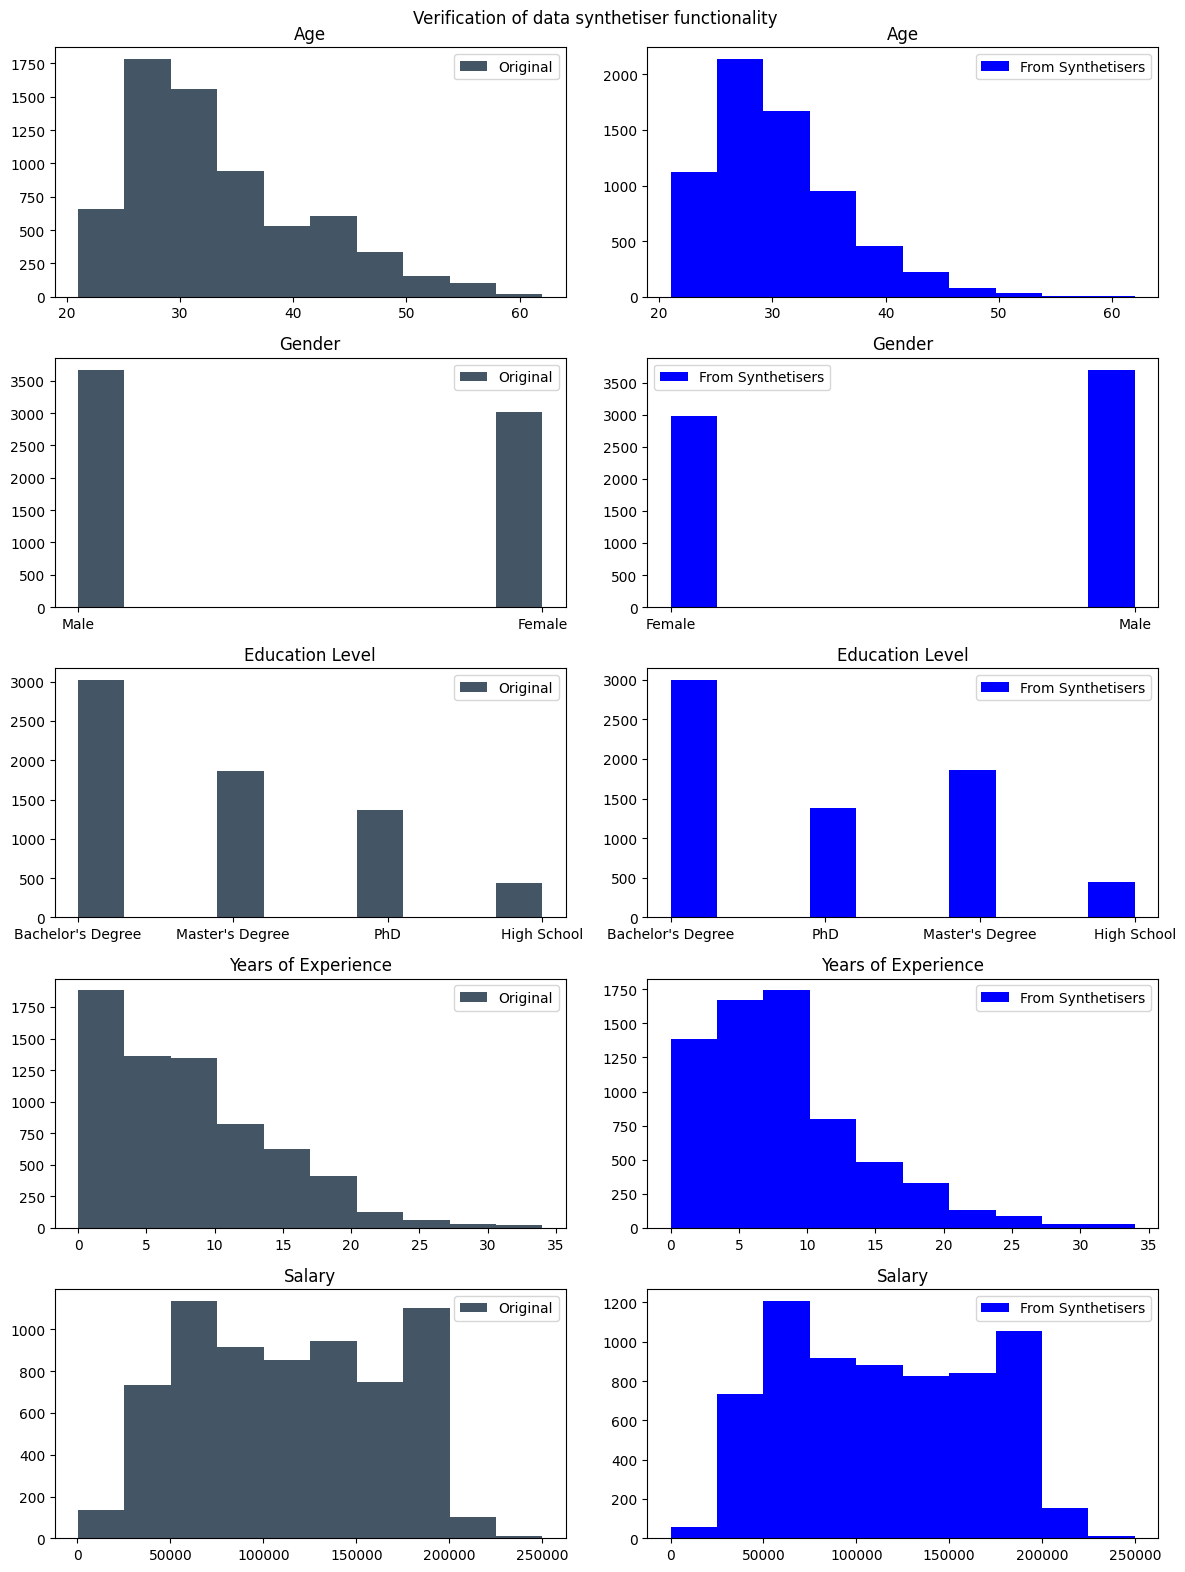

In [143]:
# Draw comparison histograms from the newly generated synthetic dataframe

# individual comparison of each varaible
c=df.columns # get original column names
cs=df_Ver.columns # get synthesised column names
fig, axs = plt.subplots(5,2, figsize=(12,16))
fig.suptitle('Verification of data synthetiser functionality',fontsize=12)
#set grid coordinates for looped subplots
rows=[0,1,2,3,4]
#rows_sy=[0,0,1,1,2,2]

#loop through numeric data and draw histogram + indicate mean
for i in range(len(c)):
    # original
    axs[rows[i],0].hist(df[c[i]],bins=10,label="Original",color='#445566')
    axs[rows[i],0].set_title(c[i])
    axs[rows[i],0].legend()
    # synthetic
    axs[rows[i],1].hist(df_Ver[cs[i]],bins=10,label="From Synthetisers",color='b')
    axs[rows[i],1].set_title(cs[i])
    axs[rows[i],1].legend()

plt.tight_layout() #keep the text from overlapping
plt.show()

#### 6.4 Relationships between synthetic variables

As described in the data analysis when investigating relationships between variables (3.) there was a strong positive relation between numeric variables (Age, Years of Experience and Salary) while subsequent analysis with pairplots and boxplots revealed a notable negative correlation between 'Female' Gender category and Salary.
Conducting a similar analysis on the synthetic data reveals that these relationships did not replicate in the synthetic data. Perhaps because the variables were generated independently based on a random distribution, not influenced by other variables. Further study required on this issue.

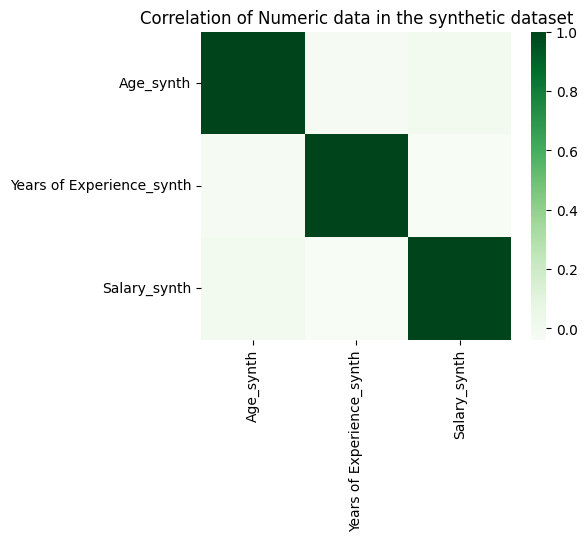

,Age_synth,Years of Experience_synth,Salary_synth
Age_synth,1.000000,-0.01808,0.000953
Years of Experience_synth,-0.018080,1.00000,-0.038100
Salary_synth,0.000953,-0.03810,1.000000


In [137]:
# Calculate correlations between Numeric data in the synthetic dataset

# select numeric variables (.corr() does not support categorical data)
plotCorr=df_synth[['Age_synth','Years of Experience_synth','Salary_synth']].corr() 
plt.figure(figsize=(5, 4)) # set plot size
sns.heatmap(plotCorr, cmap='Greens') 
plt.title("Correlation of Numeric data in the synthetic dataset")
plt.show()
plotCorr # display the correlation matrix

# render heatmap to visualise correlation between variables (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Comparing relationships in the synthesised data


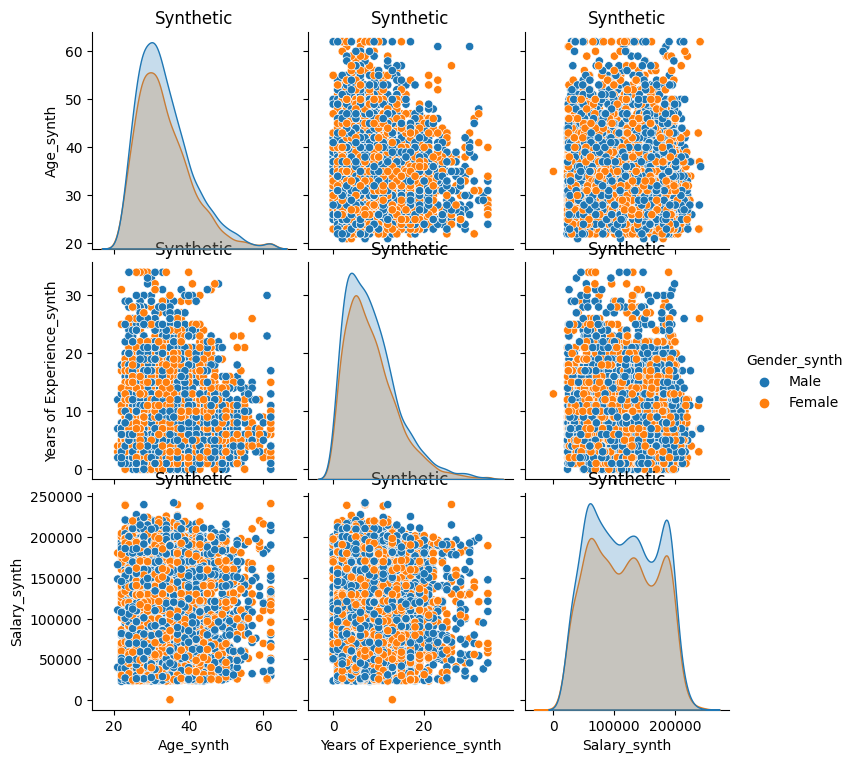

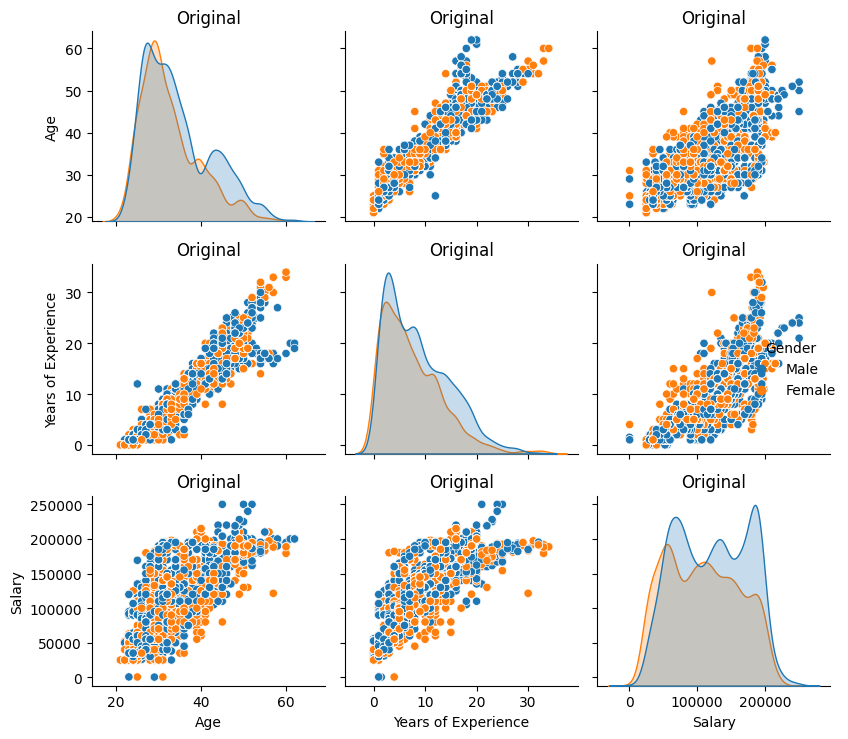

In [138]:
print("Comparing relationships in the synthesised data")
sns.pairplot(df_synth, hue='Gender_synth').set(title='Synthetic')
sns.pairplot(df, hue='Gender').set(title='Original')
plt.tight_layout()
plt.show()

Both correlation heatmap plot and the pairplots demonstrate that the inter-variable relationships did not replicate in the synthetic dataframe.

### 7. Conclusion


The exploration of the employee dataset in Salary_Data.csv uncovered a few interesting patterns. The analysis revealed a strong positive correlation between age, years of experience, and achievable salaries. Meanwhile, a notable wage disparity was revealed between male and female employees regardless of their level of education. This highlights the challenges faced by female workers, particularly the apparent salary "glass ceiling" around the 200,000 mark.<br>
Various data visualizations were used to discover these patterns. <br>Bar charts for categorical variables revealed the distribution of gender and education levels.
Histograms for numeric variables, revealing the distributions of age, years of experience, and salary, providing insights into the shapes and peaks of these essential variables while guiding in the selection of the appropriate probability distribution models. Pairwise Plots in the context of Gender provided visualization of the distribution of salary values among genders, revealing evidence of gender-based wage disparity.
Box Plots grouped by Education Level and Gender revealed the correlation between education levels and salaries and provided further evidence of existing disparities between male and female groups across different education levels.<br>
A suite of synthesizer routines were created to synthesize the individual variables matching the characteristics of the original data as much as possible using various random distribution models.
Gamma distribution was applied to synthesize the two unimodal numeric variables 'Age' and 'Years of Experience' while a KDE model was utilized to model the multimodal 'Salary' variable. For the categorical variables, a flexible function using a random choice model was employed. <br> These routines successfully generated a synthetic dataframe that contained data very closely resembling the shape and summary statistics of the individual variables.<br>
However, pairwise analysis revealed that the synthesized data did not inherit the same correlations between variables as seen in the original data. One could argue, that the relative location of individual datapoints in the independently generated synthetic variables must be random and are not influenced by other variables. Further study of the subject is needed to understand the underlying causes of this issue and to explore methods for reconstructing the relationships between variables.<br> Perhaps subsequent lectures in the remainder of the semester will provide some insight.
